In [1]:
# import the packages

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler # normalization 
from sklearn.model_selection import train_test_split # split the data
import seaborn as sns # draw the graph
# neural network model construction
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt # draw the graph

# version check
print(tf.__version__)

2.2.0


In [2]:
# read the file 
dataset = pd.read_csv('abalone.csv')
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# basic informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# single variable analysis
dataset.Sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

In [5]:
dataset.Sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: Sex, dtype: float64

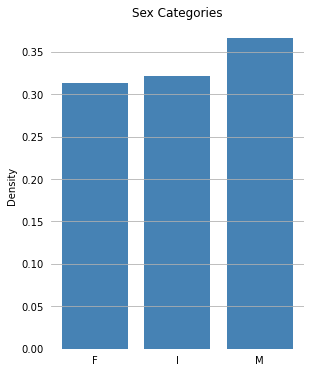

In [6]:
# using relative density to get a sense of their differences.

df_sex_category = dataset.Sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="steelblue",align="center")
axes1.set_xticks(x)
# Set x axis tick labels
axes1.set_xticklabels(df_sex_category.axes[0])
# Set x and y axis chart label
axes1.set_title("Sex Categories")
axes1.set_ylabel("Density")
axes1.xaxis.grid(False)
# Remove all of the axis tick marks
axes1.tick_params(bottom=False, top=False, left=False, right=False)
# Hide all of the spines
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major")

In [7]:
# Rings attritbute description
dataset.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

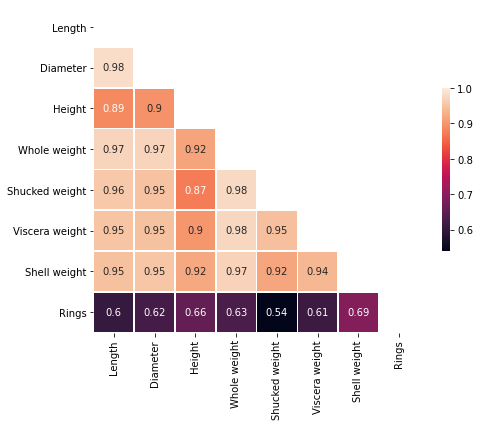

In [8]:
# Pairwise Analysis

# correlation analysis
corr = dataset.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# heat map construction
sns.heatmap(corr, mask=mask, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()

In [9]:
#one-hot encoding for categorical gender variable
 
Gender = dataset.pop('Sex')
 
dataset['M'] = (Gender == 'M')*1.0
dataset['F'] = (Gender == 'F')*1.0
dataset['I'] = (Gender == 'I')*1.0
dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0


In [10]:
# reorder the attributes
dataset = dataset[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight','Shell weight','M','F','I','Rings']]

In [11]:
X = dataset.iloc[:,0:10]
y = dataset.iloc[:,10].values

In [12]:
# normalize the data using the min-max scalar

scalar = MinMaxScaler()
X = scalar.fit_transform(X)
y = y.reshape(-1,1)
y = scalar.fit_transform(y)

In [13]:
#Split data into training and testing 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Model construction 

model = Sequential()
model.add(Dense(units=10, input_dim=10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','mse'])
 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
 
history = model.fit(X_train,y_train,batch_size=5, validation_split = 0.2, callbacks=[early_stop], epochs=100)
 
# Model summary for number of parameters use in the algorithm
model.summary()

Epoch 1/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0235 - mae: 0.1037 - mse: 0.0235 - val_loss: 0.0077 - val_mae: 0.0628 - val_mse: 0.0077
Epoch 2/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0083 - mae: 0.0644 - mse: 0.0083 - val_loss: 0.0073 - val_mae: 0.0621 - val_mse: 0.0073
Epoch 3/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0080 - mae: 0.0628 - mse: 0.0080 - val_loss: 0.0069 - val_mae: 0.0594 - val_mse: 0.0069
Epoch 4/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0077 - mae: 0.0622 - mse: 0.0077 - val_loss: 0.0067 - val_mae: 0.0579 - val_mse: 0.0067
Epoch 5/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0607 - mse: 0.0074 - val_loss: 0.0067 - val_mae: 0.0582 - val_mse: 0.0067
Epoch 6/100
535/535 [==============================] - 1s 2ms/step - loss: 0.0072 - mae: 0.0597 - mse: 0.0072 - val_loss: 0.0062 - val_mae: 0.0590 - val_mse: 0.0062
Epoch 7/10

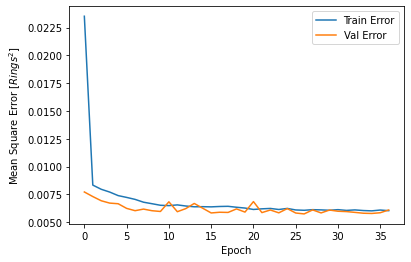

In [15]:
# plot the history 

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$Rings^2$]')
plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
plt.legend()
plt.show()

Training stoped at 36th epoch, because monitored metric (validation loss) has stopped improving.

In [16]:
# model evaluation 

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f" %(model.metrics_names[1], scores[1]))

27/27 [==============================] - 0s 2ms/step - loss: 0.0060 - mae: 0.0575 - mse: 0.0060

mae: 0.06


In [17]:
# predict testing labels
 
y_pred = model.predict(X_test)
 
# undo normalization 
 
y_pred_transformed=scalar.inverse_transform(y_pred.reshape(-1,1))
y_test_transformed=scalar.inverse_transform(y_test)

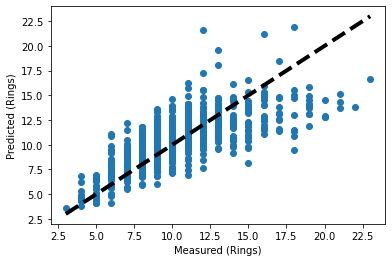

In [18]:
#visualize performance

fig, ax = plt.subplots()
ax.scatter(y_test_transformed, y_pred_transformed)
ax.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Rings)')
ax.set_ylabel('Predicted (Rings)')
plt.show()
 
#Calculate RMSE and R^2

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test_transformed, y_pred_transformed))
 
from sklearn.metrics import r2_score
r_squared=r2_score(y_test_transformed,y_pred_transformed)

The performance is not very good and more feature engineering is needed to improve the quality of the data, but also fine-tuning the neural network hyperparameters and adding features to the dataset can be used to improve performance.

In [19]:
# save the model
model.save('abalone.h5')